In [1]:
from fractal_deriv import *
from observer import *
f_sampling = 1000
N = 1024

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


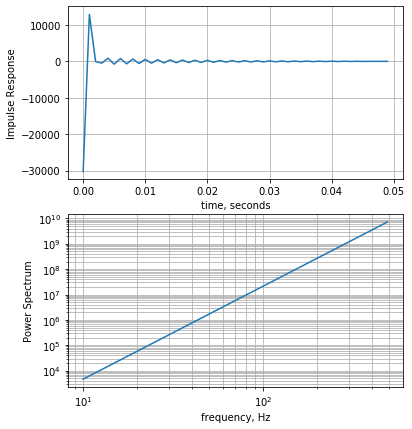

In [2]:
rms = lambda data: np.sqrt(np.mean(data**2))
x = design_filt(dt=1/f_sampling, N=100)

/Users/adityasengupta/projects/adaptive-optics/control/dev/fractal_deriv.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y[k] = np.sum(u[range(k,k-L,-1)]*a[0:L])


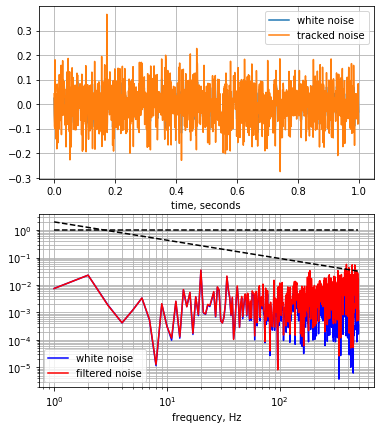

In [4]:
openloop = np.load('keck_tt/Centroid_n0088.npy')
centroids_x = openloop[:1000, 0]
filtered_keck = filt(x, dt=1e-3, u=centroids_x)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(filtered_keck)
plt.plot(centroids_x)

/Users/adityasengupta/projects/adaptive-optics/control/dev/observer.py:69: RuntimeWarning: invalid value encountered in sqrt
  return A * np.exp(-k * 2 * np.pi * f * times) * np.cos(2 * np.pi * f * np.sqrt(1 - k**2) * times - p)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


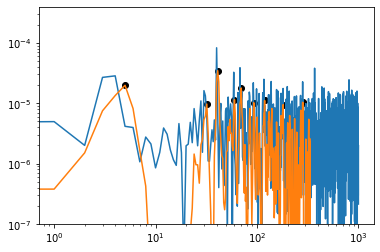

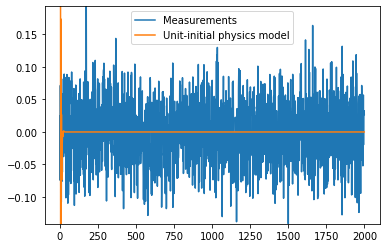

In [5]:
# let's do a naive strategy: Kalman filter with phase-space representation, no kind of parameter fit to Q

# first, let's take the Keck data and pick off the only big vibration peak in it
measurements = centroids[:2000, 0]
psd = get_psd(measurements)
plt.loglog(psd)
denoised = noise_filter(np.convolve(signal.savgol_coeffs(3, 1), psd)) 
# this isn't perfect, it has some offset, but it's fine for now
fit_params, variances = vibe_fit_freq(denoised, N=10)
plt.loglog(denoised)
frequencies = fit_params[:,0]
points = [denoised[int(i)] for i in frequencies]
plt.scatter(frequencies, points, color='k')
plt.ylim(1e-7)
plt.show()
kfilter_params = make_kfilter(fit_params, variances)
filtered = kfilter(kfilter_params, measurements)
physics = physics_predict(kfilter_params, measurements)
plt.plot(measurements, label='Measurements')
plt.plot(physics, label="Unit-initial physics model") # gaussian units!
#plt.plot(filtered, label='Filter output')
plt.ylim(min(measurements), max(measurements))
plt.legend()
plt.show()

In [ ]:
# well that's bad.